In [4]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
N = 1000
points = np.random.rand(N, 3) # X, Y, Z

In [6]:
colors = points.copy()

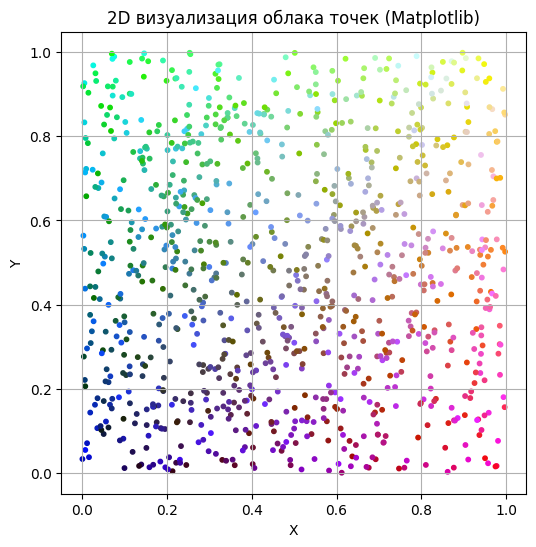

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D визуализация облака точек (Matplotlib)")
plt.grid(True)
plt.show()

In [8]:
fig = go.Figure(
    data=[
        go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=['rgb({},{},{})'.format(int(r*255), int(g*255), int(b*255)) for r, g, b in colors],
            )
        )
    ])

fig.update_layout(title='3D визуализация облака точек (Plotly)',
scene=dict(
xaxis_title='X',
yaxis_title='Y',
zaxis_title='Z'))

fig.show()

## Альтернативная схема раскраски

In [10]:
center = np.array([0.5, 0.5, 0.5])
dist = np.linalg.norm(points - center, axis=1)
norm_dist = (dist - dist.min()) / (dist.max() - dist.min()) # нормализация
colors_alt = plt.cm.viridis(norm_dist)[:, :3] # RGB из colormap

In [11]:
# 6) Переводим float RGB [0,1] -> строка 'rgb(r,g,b)'
colors_alt_plotly = [
    'rgb({},{},{})'.format(int(r * 255), int(g * 255), int(b * 255))
    for r, g, b in colors_alt
]

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:, 0],
            y=points[:, 1],
            z=points[:, 2],
            mode='markers',
            marker=dict(
                size=3,
                color=colors_alt_plotly,  # наша альтернативная раскраска
            ),
        )
    ]
)

fig.show()
